In [1]:
import os
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
def pad(l, size):
    return l + [0 for i in range(size - len(l))]

def split_lst(l, sec):
    split_l = []
    n = int(np.floor(len(l)/float(sec)))
    for i in range(n):
        split_l.append(l[i*sec:(i+1)*sec])
    if len(l) > n*sec:
        split_l.append(pad(l[(n*sec):],sec))
    return split_l

def flatten(list_of_lists):
    flat = []
    for l in list_of_lists:
        for item in l:
            flat.append(item)
    return flat

def read_initial_data(path):
    '''Args: path to FITS data files.
       Returns: a re-formatted time series, lengths, intervals
    '''
    count = 0
    rates = []
    lengths = []
    time_int = []
    max_rate = 0.
    for filename in sorted(os.listdir(path)):
        count += 1
        if count % 1000 == 0:
            print "Reading timeseries:", count
        #print count, filename
        with fits.open(path+filename, memmap=False) as example:
            hdu = example[1]
            time = hdu.data.field("TIME")
            rate = hdu.data.field("RATE")
            #print "Rate length", len(rate)
            #error = hdu.data.field("ERROR")
            #print len(time), len(rate), len(error)
            max_rate = max(max_rate, max(rate))
            avg_time = np.mean([time[i+1] - time[i] for i in range(len(time) -1)])
            time_int.append(avg_time)
            rates.append(rate)
            lengths.append(len(rate))
            del example
    # Split timeseries into 30-sec chuncks
    rates = [split_lst(list(rate), 30) for rate in rates]
    # Normalize time series
    rates = [np.array(rate)/max_rate for rate in rates]
    return rates, lengths, time_int

In [3]:
# Read data
data_path = "/Users/kati/Downloads/blackhole_nlp/nicedata_for_daniela/"
rates, lengths, time_int = read_initial_data(data_path)

Reading timeseries: 1000
Reading timeseries: 2000
Reading timeseries: 3000
Reading timeseries: 4000
Reading timeseries: 5000
Reading timeseries: 6000


/Users/kati/Envs/datascience/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/kati/Envs/datascience/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Reading timeseries: 7000
Reading timeseries: 8000
Reading timeseries: 9000
Reading timeseries: 10000
Reading timeseries: 11000
Reading timeseries: 12000
Reading timeseries: 13000


In [33]:
print "Time series with avg time interval > 1:", len([ts for ts in time_int if ts > 1.0])

Time series with avg time interval > 1: 1645


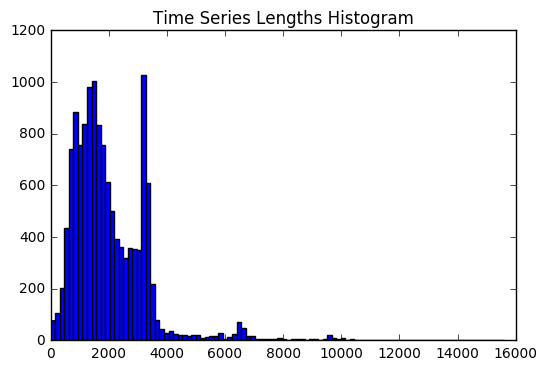

In [34]:
# Histogram of time series lengths
plt.hist(lengths, bins=100)
plt.title("Time Series Lengths Histogram")

In [ ]:
# Split time series into smaller chunks
mini_ts = flatten(rates)
# Run k-means on the chunks
kmeans = KMeans(n_clusters=10000, random_state=0).fit(mini_ts)
# Plot cluster assignments 
plt.hist(kmeans.labels_, bins=10000)
plt.title("Cluster Centers Histogram")